# Sheet 3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from collections import namedtuple

CONSTANTS = namedtuple('CONSTANTS', ['DEBUGGING'])

constants = CONSTANTS(False)


## 2 Projection Trick

(a)

When using logistic regression we are just doing something that is like linear regression, our idea is to estimate the parameters of the logistic function that gives the name to the distribution.

In [3]:
def first_one_label(labels):
    return np.where(labels == 1)[0][0]

Sorting the points


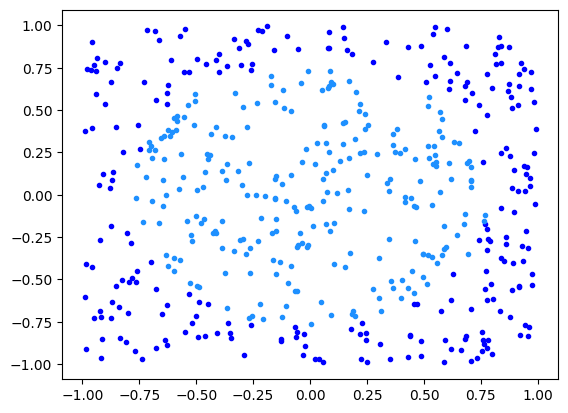

In [4]:
# Load the data
points = np.load('data03/data2d.npy')
labels = np.load('data03/labels.npy')


# Preprocessing
print("Sorting the points")
if constants.DEBUGGING:
    print(str(np.shape(points)) + "\t" + str(np.shape(labels)))

sorted_indices = np.argsort(labels)
sorted_points = points[sorted_indices]
sorted_labels = labels[sorted_indices]

X_points = sorted_points[:, 0]
Y_points = sorted_points[:, 1]

first_one_position = first_one_label(sorted_labels)
if constants.DEBUGGING:
    print(first_one_position)

X_points_label_one = X_points[first_one_position:]
X_points_label_zero = X_points[:first_one_position]
Y_points_label_one = Y_points[first_one_position:]
Y_points_label_zero = Y_points[:first_one_position]


# Plot the data
plt.scatter(X_points_label_zero, Y_points_label_zero, c="blue", marker=".")
plt.scatter(X_points_label_one, Y_points_label_one, c="dodgerblue", marker=".")
plt.show()

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def logistic_regression_fitter(classifier, dataset, labels):
    # Fit logistic regression
    X_train, X_test, Y_train, Y_test = train_test_split(dataset, labels, test_size=0.2)
    if constants.DEBUGGING:
        print(str(np.shape(X_train)) + "\t" + str(np.shape(Y_train)) + "\t" + str(np.shape(X_test)) + "\t" + str(np.shape(Y_test)))

    classifier.fit(X_train, Y_train)
    

    # Compute the accuracy
    predictions = classifier.predict(X_test)
    accuracy = accuracy_score(Y_test, predictions)
    print("accuracy: " + str(accuracy))
    return (X_test, predictions)

In [62]:
def decision_boundary_computer(X, pred_func):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    if constants.DEBUGGING:
        print("np.arange(x_min, x_max, h) and np.arange(y_min, y_max, h)")
        print(str(np.shape(np.arange(x_min, x_max, h))) + "\t" + str(np.shape(np.arange(y_min, y_max, h))))
        print("x_min and x_max => " + str(x_min) + "\t" + str(x_max))
        print("y_min and y_max => " + str(y_min) + "\t" + str(y_max))
        print("xx and yy")
        print(str(np.shape(xx)) + "\t" + str(np.shape(yy)))
        print("Z")
        print(np.shape(Z))
        
    return plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)

accuracy: 0.56
0	1


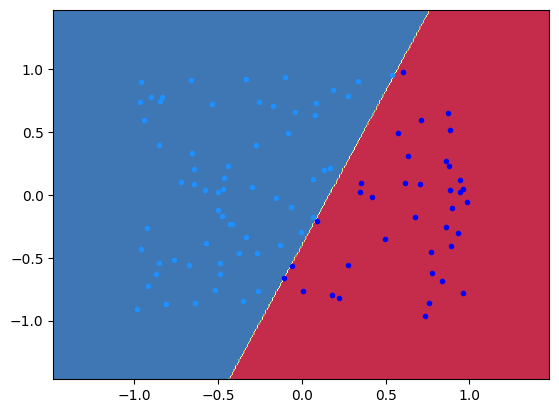

In [64]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(solver="liblinear")
X_test, predictions = logistic_regression_fitter(classifier, points, labels)

# Visualize the decision boundary
# Preprocessing
sorted_indices = np.argsort(predictions)
sorted_test_points = X_test[sorted_indices]
sorted_preds = predictions[sorted_indices]

X_test_points = sorted_test_points[:, 0]
Y_test_points = sorted_test_points[:, 1]

first_one_position = first_one_label(sorted_preds)
print(str(sorted_preds[0]) + "\t" + str(sorted_preds[first_one_position]))

X_points_pred_one = X_test_points[first_one_position:]
X_points_pred_zero = X_test_points[:first_one_position]
Y_points_pred_one = Y_test_points[first_one_position:]
Y_points_pred_zero = Y_test_points[:first_one_position]

# Plotting
decision_boundary = decision_boundary_computer(sorted_test_points, lambda x: classifier.predict(x))
plt.scatter(X_points_pred_zero, Y_points_pred_zero, c="blue", marker=".")
plt.scatter(X_points_pred_one, Y_points_pred_one, c="dodgerblue", marker=".")
plt.show()

(b)

(500,)


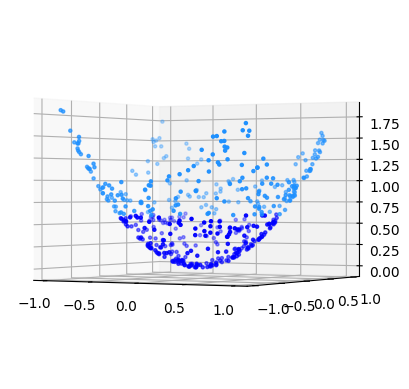

In [7]:
import math

# Come up with a nonlinear tranformation for the third feature. Compute it and concatenate to the data.
moduli = np.array([])
# For some reason in the solution instead of taking the modulus for every point they took the squared modulus value, the transformation that moves us to polar coordinates is already non-linear, so I don't get the need for considering the squared modulus.
for point in sorted_points:
    moduli = np.append(moduli, point[0]**2 + point[1]**2)
print(np.shape(moduli))


# Show the enhanced data, e.g. with a 3D scatter plot 
# Preprocessing
first_one_position = first_one_label(sorted_labels)
moduli_label_one = moduli[first_one_position:]
moduli_label_zero = moduli[:first_one_position]
if constants.DEBUGGING:
    print(str(np.shape(X_points_label_one)) + "\t" + str(np.shape(Y_points_label_one)) + "\t" + str(np.shape(moduli_label_one)))
    print(moduli_label_one[10])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=0)
ax.scatter(X_points_label_one, Y_points_label_one, moduli_label_one, c="blue", marker=".")
ax.scatter(X_points_label_zero, Y_points_label_zero, moduli_label_zero, c="dodgerblue", marker=".")

In [72]:
# Again, fit and evaluate logistic regression
# Reshaping the array to make it (500, 3).
tridimensional_points = np.empty((0, 3))
for i in range(np.shape(sorted_points)[0]):
    tridimensional_points = np.vstack([tridimensional_points, np.append(sorted_points[i], moduli[i])])
print(np.shape(tridimensional_points))

classifier = LogisticRegression(solver="liblinear")
test_points, predictions = logistic_regression_fitter(classifier, tridimensional_points, sorted_labels)

# Visualize the decision boundary
# Preprocessing
X_test_points = tridimensional_points[:, 0]
Y_test_points = tridimensional_points[:, 1]
Z_test_points = tridimensional_points[:, 2]
print(str(np.shape(X_test_points)) + "\t" + str(np.shape(Y_test_points)) + "\t" + str(np.shape(Z_test_points)))

first_one_position = first_one_label(predictions)
print(str(sorted_preds[0]) + "\t" + str(sorted_preds[first_one_position]))

(500, 3)
accuracy: 1.0
(500,)	(500,)	(500,)
0	0


## 3) Linear regions of MLPs

(a)

In [9]:
# TODO: define NN architecture

In [10]:
# TODO: instantiate the model and make the visualizations as requested in the task

(b)

In [11]:
# TODO: instantiate the model and make the visualizations as requested in the task

(c)

In [12]:
# TODO: instantiate the model and make the visualizations as requested in the task

(d)

In [13]:
# TODO: define NN architecture

In [14]:
# TODO: instantiate the model and make the visualizations as requested in the task